In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:

# Загрузка данных
df = pd.read_csv('diamonds.csv')


In [3]:
# Разведочный анализ данных (EDA)
def perform_eda(df):
    print(df.head())
    print(df.info())
    print(df.describe())
    
    # Визуализация распределений
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    for col in numeric_columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f'Распределение {col}')
        plt.show()
    
    # Корреляционная матрица
    plt.figure(figsize=(12, 10))
    sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
    plt.title('Корреляционная матрица')
    plt.show()


In [4]:
# Подготовка данных
def prepare_data(df):
    # Кодирование категориальных переменных
    df = pd.get_dummies(df, columns=['cut', 'color', 'clarity'])
    
    # Разделение на признаки и целевую переменную
    X = df.drop('price', axis=1)
    y = df['price']
    
    # Разделение на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test


In [5]:

# Построение и оценка модели
def build_and_evaluate_model(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'R²: {r2}')
    
    return model, y_pred


In [6]:
# Анализ важности признаков
def analyze_feature_importance(model, X):
    importance = pd.DataFrame({'feature': X.columns, 'importance': model.coef_})
    importance = importance.sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=importance)
    plt.title('Важность признаков')
    plt.show()


In [7]:
# Визуализация результатов
def visualize_results(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Фактические цены')
    plt.ylabel('Предсказанные цены')
    plt.title('Фактические vs Предсказанные цены')
    plt.show()
    
    # Визуализация остатков
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Предсказанные цены')
    plt.ylabel('Остатки')
    plt.title('График остатков')
    plt.show()


   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940

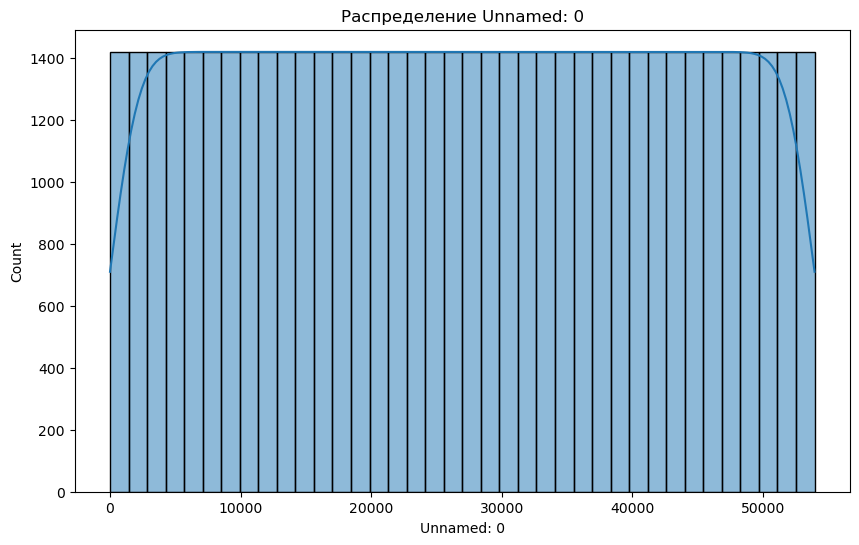

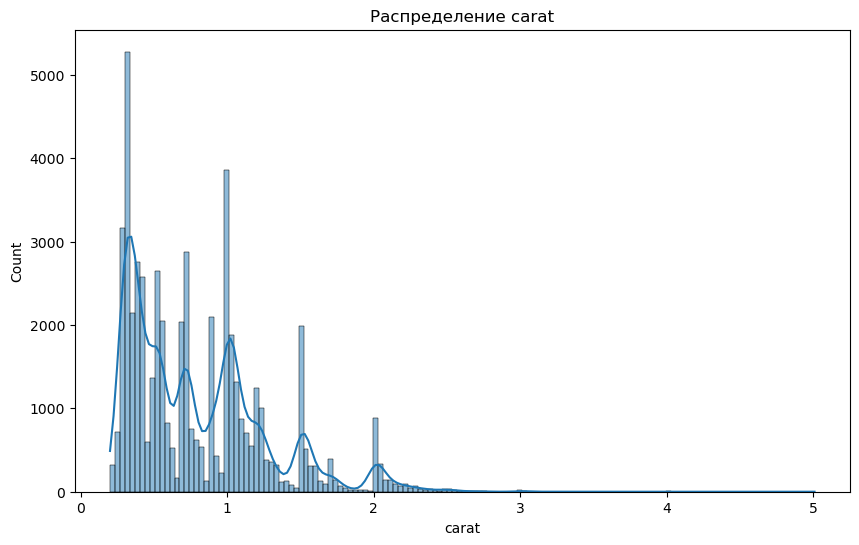

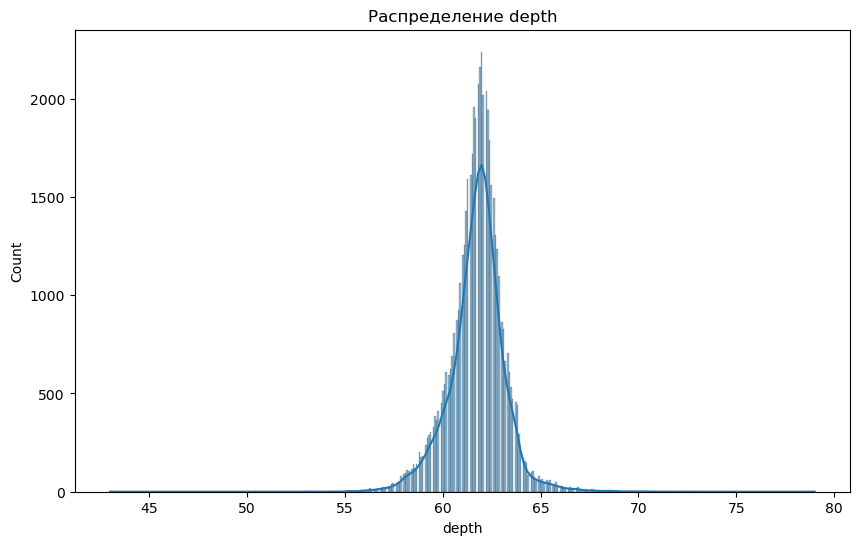

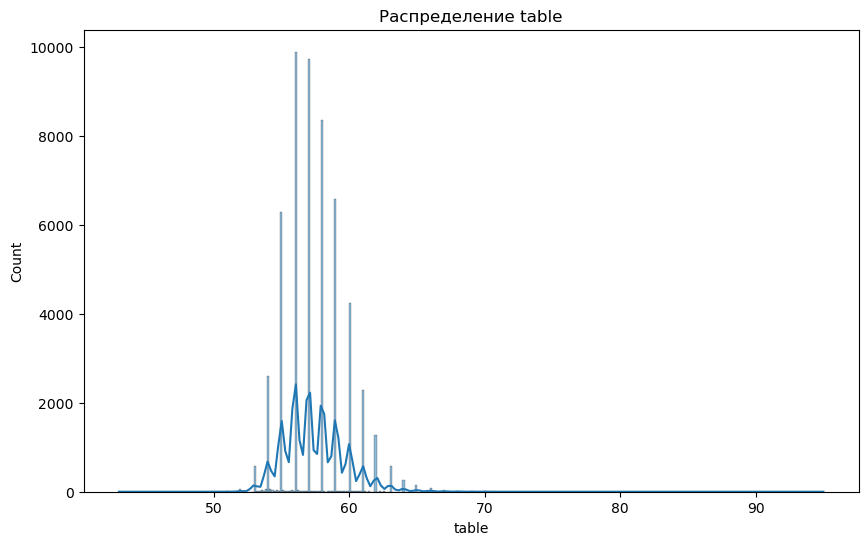

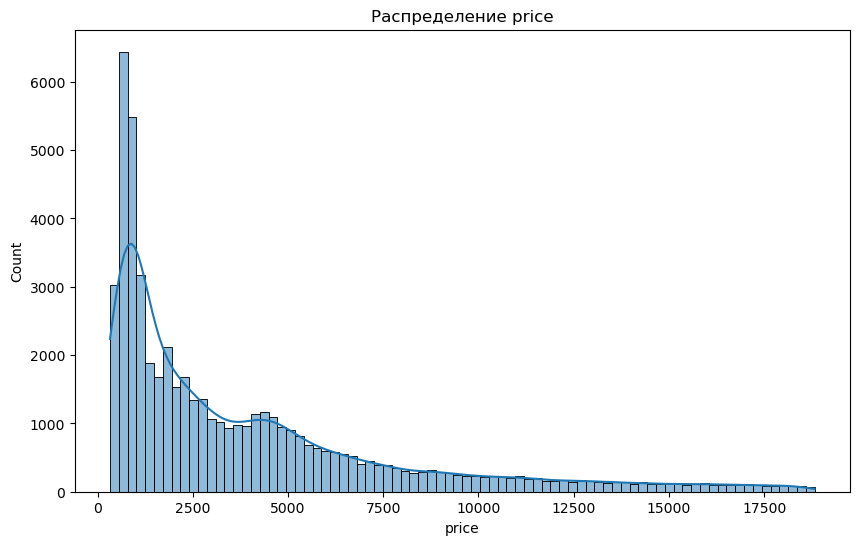

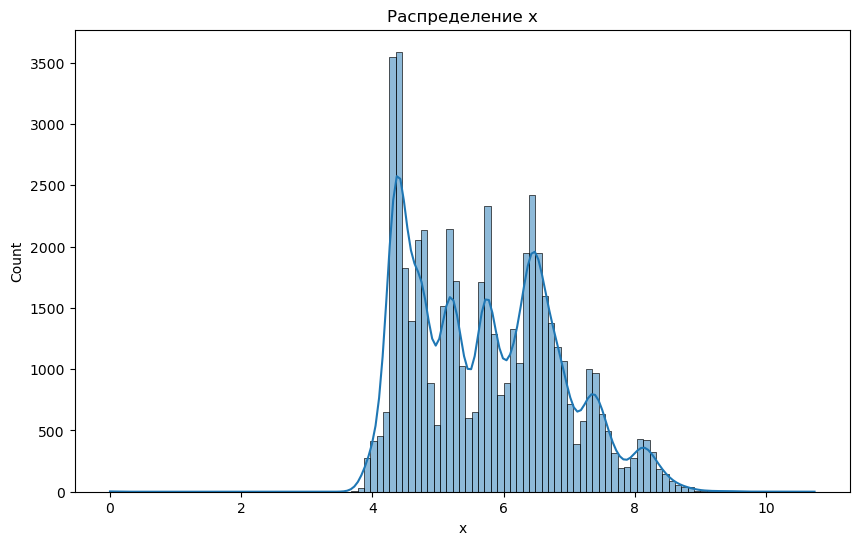

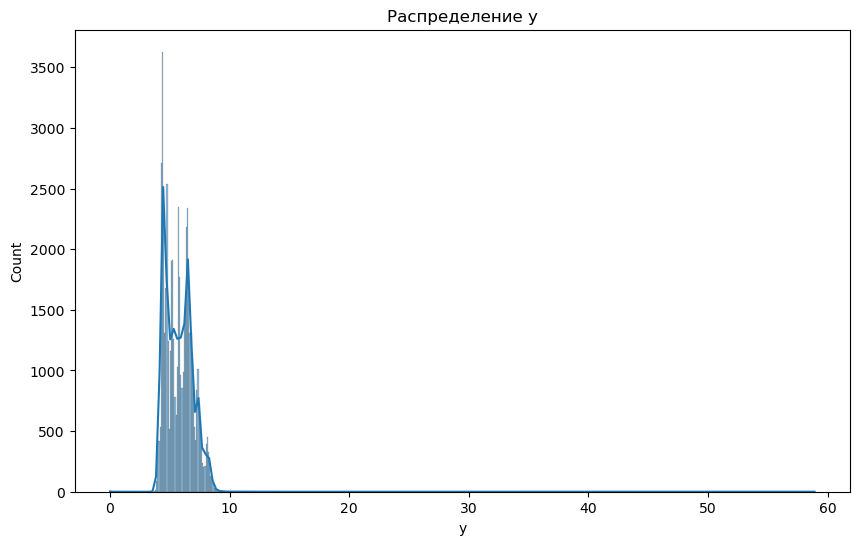

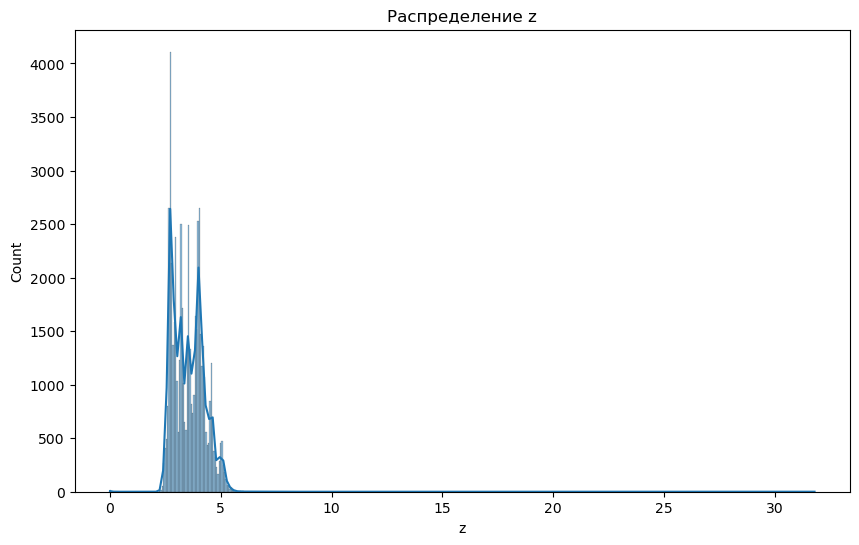

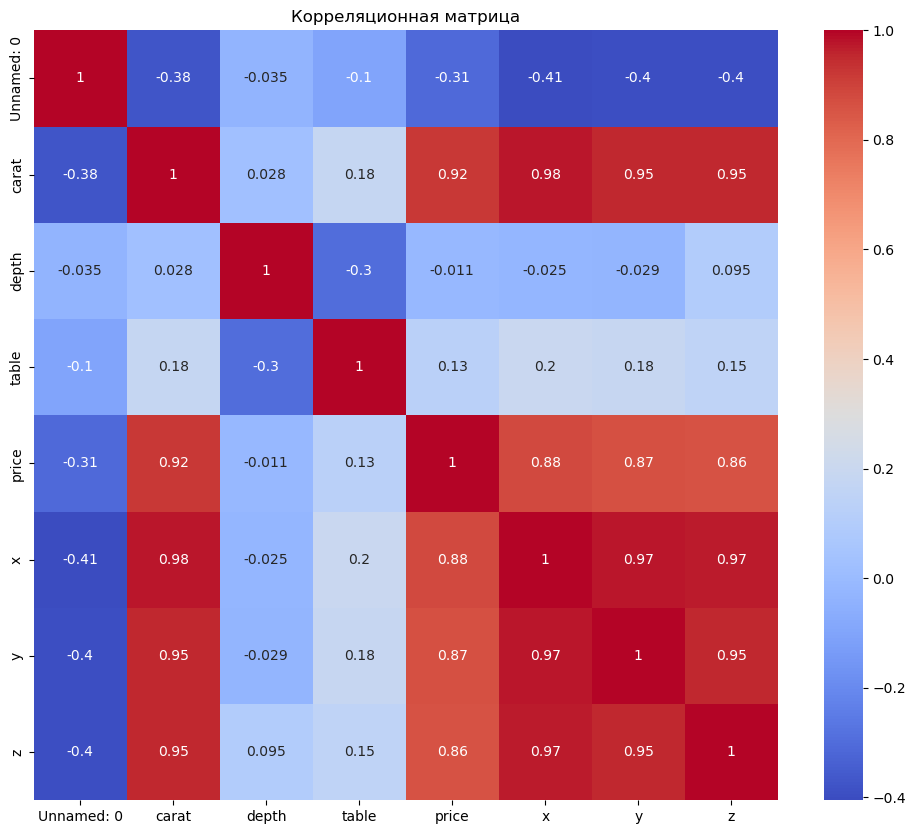

MAE: 737.1353607728863
MSE: 1282237.9409818375
R²: 0.9193399796988827


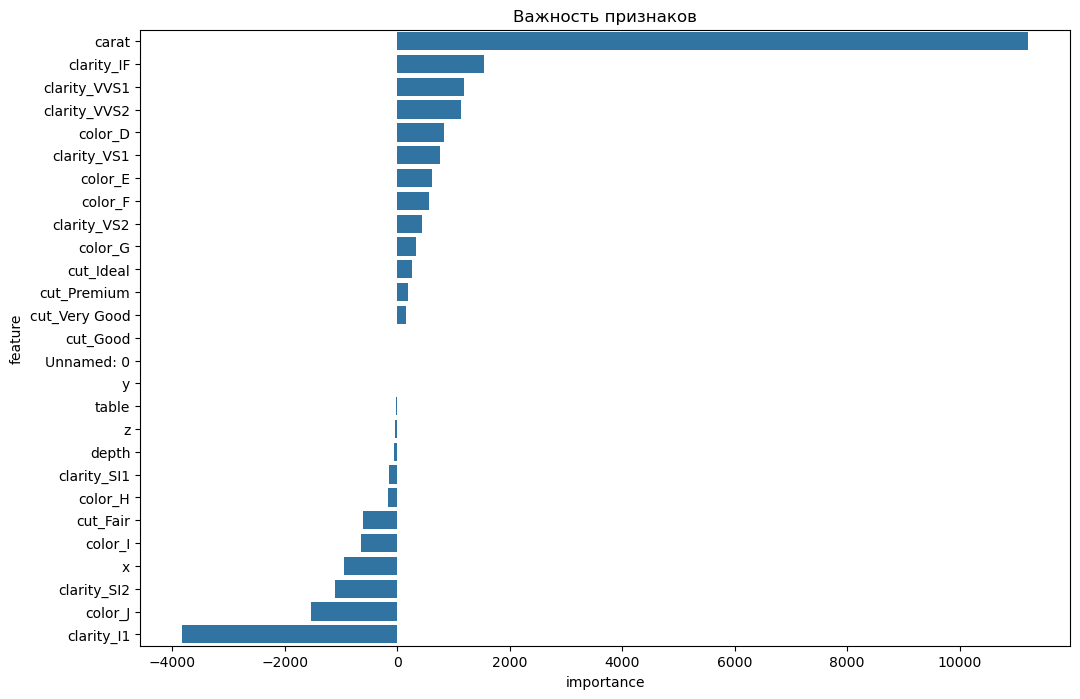

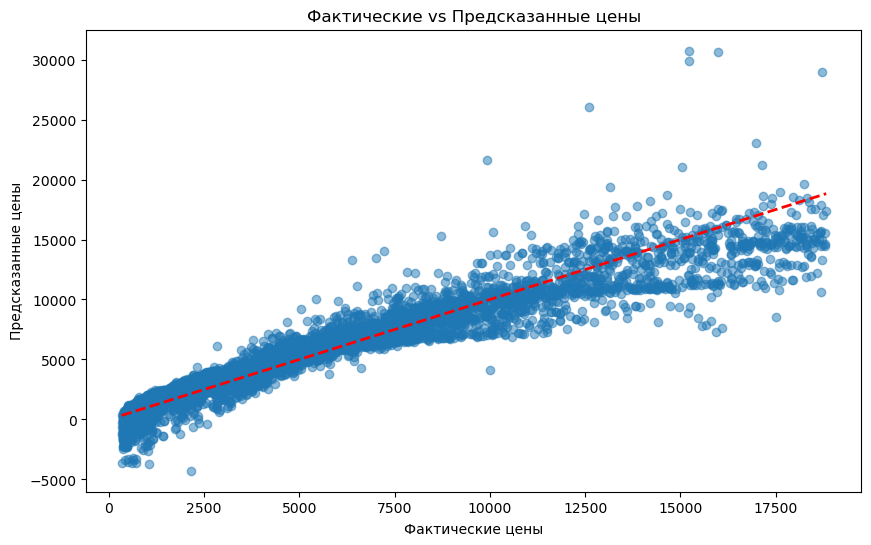

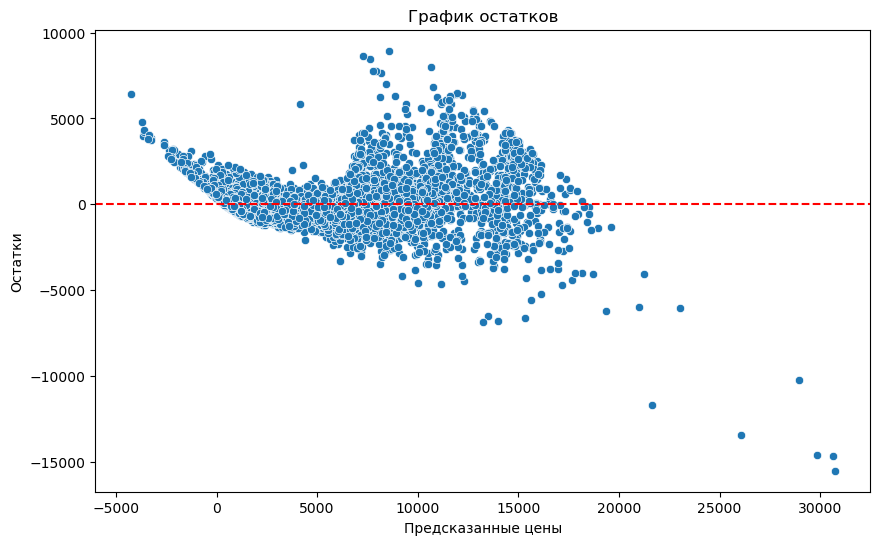

In [9]:
df = pd.read_csv('diamonds.csv')
perform_eda(df)
X_train, X_test, y_train, y_test = prepare_data(df)
model, y_pred = build_and_evaluate_model(X_train, X_test, y_train, y_test)
analyze_feature_importance(model, X_train)
visualize_results(y_test, y_pred)

In [10]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
